In [ ]:
# 1) DATA PREPROCESSING

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [13]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
target=pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [16]:
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


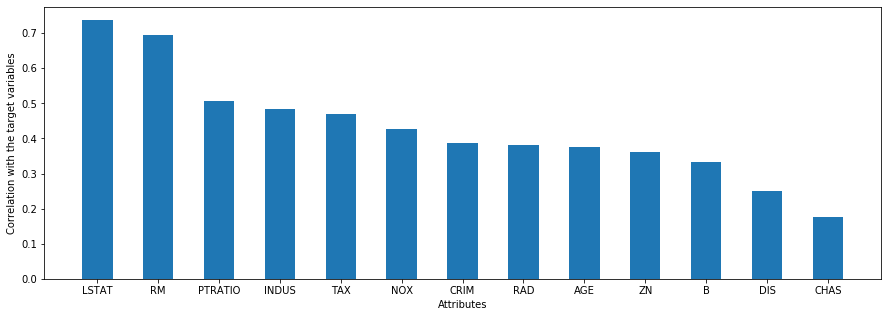

In [17]:
#calculating correlations
corr = df.corr('pearson')
#take absolute values
corrs=[abs(corr[attr]['target']) for attr in list(features)]
#make a list of pairs [(corrs,feature])
l=list(zip(corrs, list(features)))

l.sort(key= lambda x: x[0], reverse=True)
corrs, labels =list(zip((*l)))

index=np.arange(len(labels))

plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variables')
plt.xticks(index,labels)
plt.show()

In [19]:
# 2) DATA NORMALIZATION
X=df['LSTAT'].values
Y=df['target'].values

In [20]:
#values before scaling
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [21]:
#values after scaling
x_scaler= MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1, 1))
X=X[:, -1]

y_scaler= MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1, 1))
Y=Y[:, -1]


In [22]:
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [23]:
# 3) SPLITTING DATA INTO TRAINING AND TESTING DATASETS
xtrain, xtest, ytrain, ytest =train_test_split(X ,Y ,test_size=0.2)

In [24]:
# 4) BUILDING THE MODEL
def error(m , x, c, t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e* 1/(2*N)

def update(m, x, c, t, learning_rate) :
    grad_m = sum(2*((m * x +c)- t )*x)
    grad_c = sum(2*((m * x +c)- t ))
    m = m - grad_m * learning_rate
    c= c - grad_c * learning_rate
    return m , c
    
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values= list()
    for i in range(iterations):
        e = error(m,x,c,t)
        if e < error_threshold :
            print('Error less than the threshold. Stopping gradient descent')
            break
        error_values.append(e)
        m,c = update(m, x , c , t, learning_rate)
        mc_values.append((m,c))
    return m , c , error_values, mc_values


In [25]:
%%time
init_m= 0.9
init_c= 0
learning_rate = 0.001
iterations =250
error_threshold = 0.001

m , c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate,iterations,error_threshold)

Wall time: 188 ms


In [26]:
print( m, c)

-0.7677204484367092 0.6170082890928339


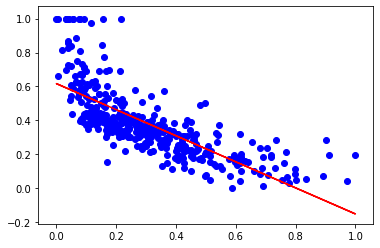

In [27]:
# 5) VISUALIZATION OF LEARNING PROCESS
plt.scatter(xtrain,ytrain , color='b')
plt.plot(xtrain, m * xtrain+c , color='r')

Text(0.5, 0, 'Iterations')

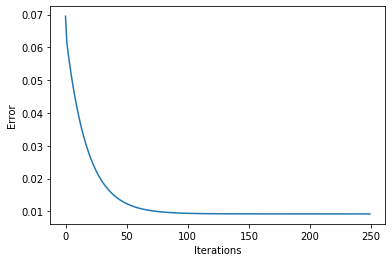

In [28]:
#plotting error values
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

In [29]:
# 6) PREDICTION OF THE MODEL

predicted = (m * xtest)+c
mean_squared_error(ytest, predicted)

0.0214181410194803

In [30]:
p = pd.DataFrame(list(zip(xtest,ytest,predicted)), columns = ['x', 'target_y', 'predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.360651,0.308889,0.340129
1,0.901766,0.208889,-0.075296
2,0.796358,0.000000,0.005628
3,0.098234,0.511111,0.541592
4,0.185155,0.382222,0.474861


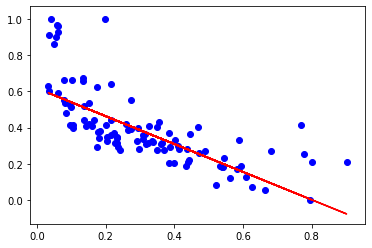

In [31]:
#plotting predicted value against target value
plt.scatter(xtest , ytest , color='b')
plt.plot(xtest, predicted , color='r')

In [32]:
#reverting the normalization to obtain predicted price of the boston houses
predicted= predicted.reshape(-1 , 1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

In [33]:
xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)


In [34]:
#slicing
xtest_scaled= xtest_scaled[:, -1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled= predicted_scaled[:,-1]

In [35]:
p =pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)), columns = ['x(LSTAT)', 'target_boston_house_prices(in $1000)','predicted_boston_house_prices(in $1000)'])
p=p.round(decimals = 2)
p.head()

,x(LSTAT),target_boston_house_prices(in $1000),predicted_boston_house_prices(in $1000)
0,14.80,18.9,20.31
1,34.41,14.4,1.61
2,30.59,5.0,5.25
3,5.29,28.0,29.37
4,8.44,22.2,26.37
